# Problem Set 4: Fixed Income

# Task 1: From Forwards to Interest

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# a)

In [10]:
#Load Data
data_FTSE = pd.read_excel(r"PS4 - Data 1.xlsx")

#Define Fixed Values
facevalue = 100
spot = data_FTSE.iloc[0,1]
dvd = 0.0005

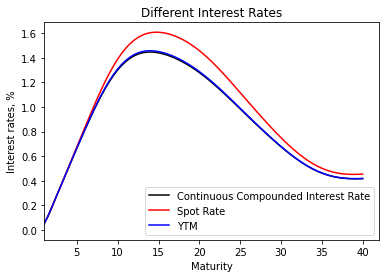

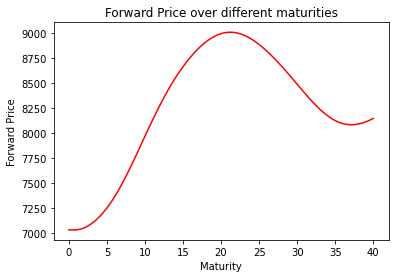

In [12]:
# (i) continuously compounded interest rate
# exp(-my)*F = S*exp(-mdelta) (15.7)
#y = ln(F/S)/m + delta

for column in data_FTSE:
    y = (np.log(data_FTSE['fwd price']/spot) / data_FTSE['maturity']) + dvd
data_FTSE['Cont Comp Int Rate'] = y

# (ii) Effective Interest rate (YTM)
# YTM = (((F/S)*exp(m*delta))**(1/m)) - 1

for column in data_FTSE:
    ytm = (((data_FTSE['fwd price']/spot)*np.exp(data_FTSE['maturity']*dvd))**(1/data_FTSE['maturity'])) - 1
data_FTSE['YTM'] = ytm

# (iii) Effective spot interest rate 
for column in data_FTSE:
    Y = (((data_FTSE['fwd price']/spot)*np.exp(data_FTSE['maturity']*dvd))-1)/data_FTSE['maturity']
data_FTSE['Spot Rate'] = Y

plt.plot(data_FTSE['maturity'], data_FTSE['Cont Comp Int Rate']*100, color ='black', label = 'Continuous Compounded Interest Rate')
plt.plot(data_FTSE['maturity'], data_FTSE['Spot Rate']*100, color = 'red', label = 'Spot Rate')
plt.plot(data_FTSE['maturity'], data_FTSE['YTM']*100, color = 'blue', label = 'YTM')
plt.xlim(xmin=1)
plt.legend(loc='best')

plt.title('Different Interest Rates')
plt.xlabel('Maturity')
plt.ylabel('Interest rates, %')

plt.show()


plt.plot(data_FTSE['maturity'], data_FTSE['fwd price'], color = 'red')
plt.title('Forward Price over different maturities')
plt.xlabel('Maturity')
plt.ylabel('Forward Price')
plt.show()

# b)

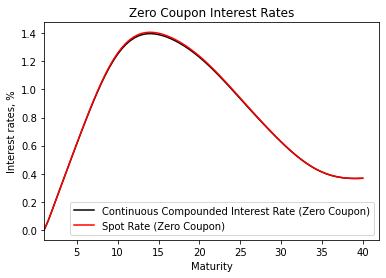

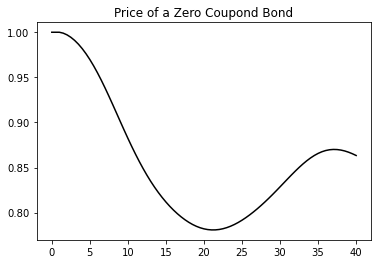

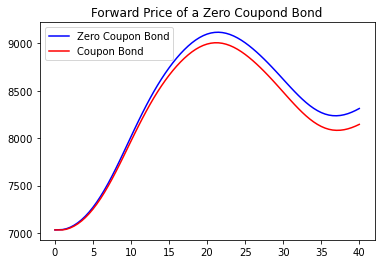

In [14]:
# Computation Interest rates for a zero coupon bond
# (i) Continuously compounded interest rate
# F = exp(my)*S (15.5)
# y = ln(F/S) / m
for column in data_FTSE:
    y_nd = np.log(data_FTSE['fwd price']/spot) / data_FTSE['maturity']
data_FTSE['Cont Comp Int Rate no Dvd'] = y_nd

# (ii) Effective Interest Rate (YTM)
#F = ((1+Y)**m)* S
#Y = ((F/S)**(1/m))-1
for column in data_FTSE:
    Y_nd = ((data_FTSE['fwd price']/spot)**(1/data_FTSE['maturity']))- 1
data_FTSE['Effective Interest Rate no Dvd'] = Y_nd

# (iii) Effective Spot Interest rate
# Effective Spot Interest Rate = Effective Interest Rate for a Zero Coupon Bond

plt.plot(data_FTSE['maturity'], data_FTSE['Cont Comp Int Rate no Dvd']*100, color ='black', label = 'Continuous Compounded Interest Rate (Zero Coupon)')
plt.plot(data_FTSE['maturity'], data_FTSE['Effective Interest Rate no Dvd']*100, color = 'red', label = 'Spot Rate (Zero Coupon)')
plt.xlim(xmin=1)
plt.legend(loc='best')
plt.title('Zero Coupon Interest Rates')
plt.xlabel('Maturity')
plt.ylabel('Interest rates, %')
plt.show()

# Zeo Coupon Prices
# B(m) = (1+Y(m))**-m (16.2)
for column in data_FTSE:
    B = ((1+data_FTSE['Effective Interest Rate no Dvd']))**-data_FTSE['maturity']
data_FTSE['Zero Coupon Bond Price'] = B

plt.plot(data_FTSE['maturity'], data_FTSE['Zero Coupon Bond Price'], color='black')
plt.title("Price of a Zero Coupond Bond")
plt.show()

#and the Forward Price
#FWD_Zero = exp(my)S
FWD_Zero = (np.exp(data_FTSE['maturity']*data_FTSE['YTM']))*spot
data_FTSE['fwd price zero coupon'] = FWD_Zero

plt.plot(data_FTSE['maturity'], data_FTSE['fwd price zero coupon'], color='blue', label='Zero Coupon Bond')
plt.plot(data_FTSE['maturity'], data_FTSE['fwd price'], color='red', label='Coupon Bond')
plt.title("Forward Price of a Zero Coupond Bond")
plt.legend(loc='best')
plt.show()

# c)

In [16]:
#Forward Rate of a contract entering in 3y and selling in 20y
# FWR = (((1+Y(n))**(n((n-m)))) / ((1+Y(m))**(m/n-m))) - 1 (16.15)
#m=3, n=20
# FWR = ((1+Y(20)**(20/17))/(1+Y(17))**(3/17))-1

Y_20 = data_FTSE.iloc[39, 4]
Y_17 = data_FTSE.iloc[33, 4]
nominator = (1+Y_20)**(20/17)
denominator = (1+Y_17)**(3/17)

FWR = (nominator/denominator) - 1
print("The forward rate of a contract entering in 3 years and selling in 20 years is " + str(round(FWR, 5)))

The forward rate of a contract entering in 3 years and selling in 20 years is 0.01437


# Problem 2

# a)

In [17]:
#Formula (16.17)
#Calculation of first part of Sum

c=0.01
m = 40
def odd_count(n):
    return list(range(1,n+1, 2))
v1 = odd_count(78) #Create vector with uneven numbers since uneven = even years

price = []
for i in v1:
    value = (c/((1+data_FTSE.iloc[i, 6])**data_FTSE.iloc[i, 0]))
    price.append(value)
   
sum1_2b = sum(price)

sum2_2b = 100/((1+data_FTSE.iloc[79, 6])**data_FTSE.iloc[79, 0])

bond_price = sum1_2b + sum2_2b
print("The price of the bond is: " + str(round(bond_price, 3)))

The price of the bond is: 86.667


# b)

In [18]:
#Approx YTM = 2((c+(1-P)(K)))/(1+P) (Remark 16.26)

YTM_2b = 2*(1+(100-bond_price)/m)/(100+bond_price)
print("The YTM is: " + str(round(YTM_2b, 3)))

The YTM is: 0.014


# c)

In [19]:
price2c = []
v2 = odd_count(80)
for i in v2:
    value2c = data_FTSE.iloc[i, 0]*(0.01/(1+YTM_2b)**data_FTSE.iloc[i, 0])
    price2c.append(value2c)

sum1_2c = sum(price2c)

sum2_2c = 1/(1+YTM_2b)*sum1_2c

Dollar_Dur = sum2_2c
print("The Dollar Duration is: " + str(round(Dollar_Dur, 3)))
Adj_Dur = Dollar_Dur / (bond_price/100)
print("The adjusted Duration is: " + str(round(Adj_Dur, 3)))
Macaulay_Dur = Dollar_Dur*(1+YTM_2b) / (bond_price/100)
print("The Macaulay Duration is: " + str(round(Macaulay_Dur, 3)))

The Dollar Duration is: 5.564
The adjusted Duration is: 6.42
The Macaulay Duration is: 6.512
